特征之间存在相关性,会导致如下的后果：

1.     特征个数越多，分析特征、训练模型所需的时间就越长，模型也会越复杂。

2.     特征个数越多，容易引起“维度灾难”，其推广能力会下降。

3.     特征个数越多，容易导致机器学习中经常出现的特征稀疏的问题，导致模型效果下降。

4.     对于模型来说，可能会导致不适定的情况，即是解出的参数会因为样本的微小变化而出现大的波动。

特征选择，能剔除不相关、冗余、没有差异刻画能力的特征，从而达到减少特征个数、减少训练或者运行时间、提高模型精确度的作用。


In [1]:
import pandas as pd
import numpy as np

In [2]:
gdp = pd.read_csv('/Users/patricia/Downloads/gdp.csv')
gdp.describe(include = 'all')

,Year,第一产业GDP贡献率,第二产业GDP贡献率,第三产业GDP贡献率,就业人员,第一产业就业人员,第二产业就业人员,第三产业就业人员,总人口,0-14岁人口,...,流通中现金(M0)供应量同比增长率(%),财政收入增长率,居民消费价格指数,商品零售价格指数,工业生产者出厂价格指数,工业生产者购进价格指数,固定资产投资价格指数,全社会固定资产投资,GDP,PGDP
count,56.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,...,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,4.100000e+01,41.000000
mean,2007.500000,9.075610,50.692683,40.229268,67018.463415,30686.487805,16526.780488,19805.170732,123897.097561,28571.000000,...,14.921951,13.351220,104.912195,103.985366,103.773171,107.714634,105.119512,161921.068049,2.554681e+05,18850.292683
std,16.309506,10.124816,12.218928,10.740862,11094.811017,6035.796236,4748.809811,9283.573646,12865.420655,4067.124826,...,10.453217,8.008312,5.800095,5.715005,6.689171,9.268861,5.253485,220281.269789,3.106919e+05,22165.361428
min,1980.000000,-4.800000,17.700000,19.200000,42361.000000,17715.000000,7707.000000,5532.000000,98705.000000,22259.000000,...,2.900000,-3.900000,98.600000,97.000000,94.600000,92.100000,97.600000,910.900000,4.587600e+03,468.000000
25%,1993.750000,4.100000,43.500000,32.700000,64749.000000,27931.000000,13856.000000,11979.000000,114333.000000,24688.000000,...,8.700000,7.200000,101.800000,100.800000,98.700000,99.300000,101.100000,4753.800000,1.887290e+04,1663.000000
50%,2007.500000,5.200000,50.500000,39.000000,72085.000000,31254.000000,16234.000000,19823.000000,126743.000000,29011.000000,...,11.900000,13.100000,102.700000,102.000000,102.900000,108.100000,105.400000,32917.730000,1.002801e+05,7942.000000
75%,2021.250000,8.700000,59.600000,46.500000,75564.000000,35530.000000,21234.000000,26332.000000,134091.000000,32339.000000,...,19.400000,19.900000,106.400000,105.900000,106.200000,116.000000,108.000000,278121.850000,4.121193e+05,30808.000000
max,2035.000000,40.500000,85.600000,63.500000,76349.000000,39098.000000,23226.000000,35806.000000,141178.000000,34146.000000,...,49.500000,32.400000,124.100000,121.700000,124.000000,135.100000,126.600000,645675.000000,1.015986e+06,72000.000000


In [3]:
import math
gdp['GDP'] = gdp['GDP'].apply(lambda x: math.log(x))
gdp=gdp.dropna(axis=0,how='any')
gdp.head()

,Year,第一产业GDP贡献率,第二产业GDP贡献率,第三产业GDP贡献率,就业人员,第一产业就业人员,第二产业就业人员,第三产业就业人员,总人口,0-14岁人口,...,流通中现金(M0)供应量同比增长率(%),财政收入增长率,居民消费价格指数,商品零售价格指数,工业生产者出厂价格指数,工业生产者购进价格指数,固定资产投资价格指数,全社会固定资产投资,GDP,PGDP
0,1980,-4.8,85.6,19.2,42361.0,29122.0,7707.0,5532.0,98705.0,32384.0,...,29.3,1.2,107.5,106.0,100.5,116.0,108.0,910.9,8.431112,468.0
1,1981,40.5,17.7,41.8,43725.0,29777.0,8003.0,5945.0,100072.0,32384.0,...,14.5,1.4,102.5,102.4,100.2,116.0,108.0,961.0,8.504270,497.0
2,1982,38.6,28.8,32.6,45295.0,30859.0,8346.0,6090.0,101654.0,34146.0,...,10.8,3.1,102.0,101.9,99.8,116.0,108.0,1230.4,8.589216,533.0
3,1983,23.9,43.5,32.7,46436.0,31151.0,8679.0,6606.0,103008.0,32384.0,...,20.7,12.8,102.0,101.5,99.9,116.0,108.0,1430.1,8.702992,588.0
4,1984,25.6,42.7,31.7,48197.0,30868.0,9590.0,7739.0,104357.0,32384.0,...,49.5,20.2,102.7,102.8,101.4,116.0,108.0,1832.9,8.892680,702.0


In [4]:
data=gdp[gdp.columns[1:-2]]
print(data.shape)
data.head()

(41, 25)


,第一产业GDP贡献率,第二产业GDP贡献率,第三产业GDP贡献率,就业人员,第一产业就业人员,第二产业就业人员,第三产业就业人员,总人口,0-14岁人口,15-64岁人口,...,人民币美元汇率,进出口总额,流通中现金(M0)供应量同比增长率(%),财政收入增长率,居民消费价格指数,商品零售价格指数,工业生产者出厂价格指数,工业生产者购进价格指数,固定资产投资价格指数,全社会固定资产投资
0,-4.8,85.6,19.2,42361.0,29122.0,7707.0,5532.0,98705.0,32384.0,70269.0,...,149.84,570.00,29.3,1.2,107.5,106.0,100.5,116.0,108.0,910.9
1,40.5,17.7,41.8,43725.0,29777.0,8003.0,5945.0,100072.0,32384.0,70269.0,...,170.50,735.34,14.5,1.4,102.5,102.4,100.2,116.0,108.0,961.0
2,38.6,28.8,32.6,45295.0,30859.0,8346.0,6090.0,101654.0,34146.0,62517.0,...,189.25,771.37,10.8,3.1,102.0,101.9,99.8,116.0,108.0,1230.4
3,23.9,43.5,32.7,46436.0,31151.0,8679.0,6606.0,103008.0,32384.0,70269.0,...,197.57,860.15,20.7,12.8,102.0,101.5,99.9,116.0,108.0,1430.1
4,25.6,42.7,31.7,48197.0,30868.0,9590.0,7739.0,104357.0,32384.0,70269.0,...,232.70,1201.03,49.5,20.2,102.7,102.8,101.4,116.0,108.0,1832.9


In [5]:
from sklearn.preprocessing import MinMaxScaler
#归一化 
scaler=MinMaxScaler(feature_range=(0,1))

scaled = scaler.fit_transform(data)
scaled=pd.DataFrame(scaled,columns=data.columns)

/Users/patricia/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 31532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/patricia/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 19968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/patricia/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20135 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/patricia/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 19994 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/patricia/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 36129 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/patricia/opt/anaconda3/lib/python3.8/site-p

/Users/patricia/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 31532 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/patricia/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 19968 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/patricia/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 20135 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/patricia/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 19994 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/patricia/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 36129 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/patricia/opt/anaconda3/lib/python3.8/site-packages/ma

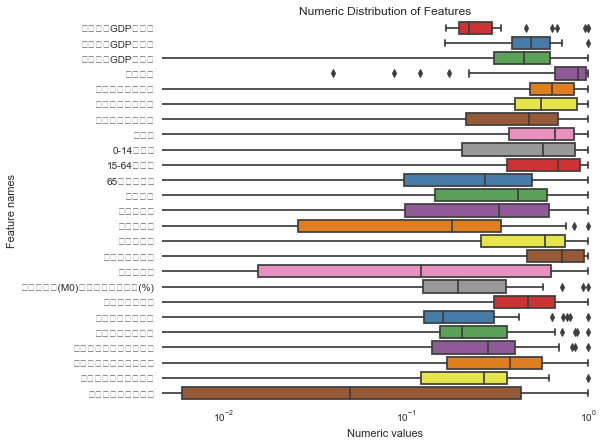

In [6]:
# Plots
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

plt.rcParams['font.family'] = 'SimHei'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.unicode_minus']=False
 

# Fetch all numeric features
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = []
for i in data.columns:
    if data[i].dtype in numeric_dtypes:
        numeric.append(i)

# Create box plots for all numeric features
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=scaled , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

## 1. Filter

**方差选择法，返回值为特征选择后的数据**

    针对离散变量,去掉取值变化小的特征（Removing features with low variance）
    

In [7]:
from sklearn.feature_selection import VarianceThreshold

#VarianceThreshold(threshold=3) 其中参数threshold为方差的阈值
x_var=VarianceThreshold(threshold=3).fit_transform(data)
x_var.shape

(41, 24)

In [8]:
pd.DataFrame(x_var).tail()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
36,4.0,36.0,60.0,76245.0,20908.0,22295.0,33042.0,139232.0,23252.0,100943.0,...,827.91,243386.46,8.1,4.5,102.0,100.7,98.6,98.0,99.4,606465.66
37,4.6,34.2,61.1,76058.0,20295.0,21762.0,34001.0,140011.0,23522.0,100528.0,...,828.98,278099.24,3.4,7.4,101.6,101.1,106.3,108.1,105.8,641238.39
38,4.1,34.4,61.5,75782.0,19515.0,21356.0,34911.0,140541.0,23751.0,100065.0,...,831.42,305010.09,3.6,6.2,102.1,101.9,103.5,104.1,105.4,645675.00
39,3.9,32.6,63.5,75447.0,18652.0,21234.0,35561.0,141008.0,23661.0,99622.0,...,835.10,315627.32,5.4,3.8,102.9,102.0,99.7,99.3,102.6,560874.30
40,9.5,43.3,47.3,75064.0,17715.0,21543.0,35806.0,141178.0,25338.0,96776.0,...,861.87,321556.93,9.2,-3.9,102.5,101.4,98.2,97.7,102.6,527270.30


In [9]:
X_train=x_var[:31]
X_test=x_var[31:41]

In [10]:
y_train = np.array(gdp["GDP"][:31]).reshape(-1, 1)
y_test = np.array(gdp["GDP"][31:41]).reshape(-1, 1)

In [11]:
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (31, 24)
y_train:  (31, 1)
X_test:  (10, 24)
y_test (10, 1)


In [12]:
from sklearn.preprocessing import MinMaxScaler
#归一化 
scaler=MinMaxScaler(feature_range=(0,1))

X_fit = scaler_filter.fit(X_train)
X_train = X_fit.transform(X_train)
X_test = X_fit.transform(X_test)

y_fit = scaler_filter.fit(y_train)
y_train = y_fit.transform(y_train).ravel()
y_test = y_fit.transform(y_test).ravel()

In [13]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
param_dict = dict(
kernel=['linear','poly', 'rbf'],
C = np.linspace(0.001, 1, 100),
degree = [2,3,4,5],
gamma=['scale', 'auto'],
)


forest_VarTh = SVR(kernel= 'poly', C= 1e2, gamma= 0.1)
all_num_iters = np.array([len(param_dict[i]) for i in param_dict.keys() if param_dict[i] is not None]).prod()
numIters = min(all_num_iters, 50)


randomSearch = RandomizedSearchCV(forest_VarTh, random_state = 42,param_distributions=param_dict, cv=10, scoring='neg_mean_squared_error',
                                  n_iter=numIters , refit=True, verbose=0, 
                                  n_jobs=1)

randomSearch.fit(X=X_train, y=y_train, groups=None)

svm_rbf_VarTh = randomSearch.best_estimator_
print("best parameters related to this boost:  ", randomSearch.best_params_)
print("best score related to this boost:  ", randomSearch.best_score_)
print(randomSearch)

best parameters related to this boost:   {'kernel': 'linear', 'gamma': 'auto', 'degree': 5, 'C': 0.8486363636363636}
best score related to this boost:   -0.0085316255011657
RandomizedSearchCV(cv=10, estimator=SVR(C=100.0, gamma=0.1, kernel='poly'),
                   n_iter=50, n_jobs=1,
                   param_distributions={'C': array([0.001     , 0.01109091, 0.02118182, 0.03127273, 0.04136364,
       0.05145455, 0.06154545, 0.07163636, 0.08172727, 0.09181818,
       0.10190909, 0.112     , 0.12209091, 0.13218182, 0.14227273,
       0.15236364, 0.16245455, 0.17254545, 0.18263636, 0.19272727,
       0.20281818, 0.2129...
       0.75781818, 0.76790909, 0.778     , 0.78809091, 0.79818182,
       0.80827273, 0.81836364, 0.82845455, 0.83854545, 0.84863636,
       0.85872727, 0.86881818, 0.87890909, 0.889     , 0.89909091,
       0.90918182, 0.91927273, 0.92936364, 0.93945455, 0.94954545,
       0.95963636, 0.96972727, 0.97981818, 0.98990909, 1.        ]),
                                

In [14]:
train_predict=svm_rbf_VarTh.predict(X_train)
test_predict=svm_rbf_VarTh.predict(X_test)

train_predict=np.reshape(train_predict, (len(train_predict), 1))
test_predict=np.reshape(test_predict, (len(test_predict), 1))
# Transform back to original form
train_predict = scaler_filter.inverse_transform(train_predict)
test_predict = scaler_filter.inverse_transform(test_predict)
original_ytrain = scaler_filter.inverse_transform(y_train.reshape(-1, 1)) 
original_ytest = scaler_filter.inverse_transform(y_test.reshape(-1, 1))

In [15]:
import math
from sklearn.metrics import mean_squared_error,mean_absolute_error
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))
print("-------------------------------------------------------------------")

Train data RMSE:  0.3278445644764599
Train data MSE:  0.10748205845675965
Test data MAE:  0.30064091133550924
-------------------------------------------------------------------------------------
Test data RMSE:  0.21277205538875218
Test data MSE:  0.04527194755435422
Test data MAE:  0.19703287442872314
-------------------------------------------------------------------


In [16]:
from sklearn.metrics import explained_variance_score,r2_score
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))
print("-------------------------------------------------------------------")
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data R2 score: 0.9441313305009629
Test data R2 score: 0.22910910551650854
-------------------------------------------------------------------
Train data explained variance regression score: 0.9513240068635552
Test data explained variance regression score: 0.890169478603415


**单变量特征选择 (Univariate feature selection)**

    分别单独的计算每个变量的某个统计指标，根据该指标来判断哪些指标重要，剔除那些不重要的指标。
    
    对于分类问题(y离散) 可采用：卡方检验，f_classif, mutual_info_classif，互信息

    对于回归问题(y连续) 可采用：皮尔森相关系数，f_regression, mutual_info_regression，最大信息系数



**Pearson Correlation**

    验证两两变量之间的线性相关性，结果的取值区间为[-1，1]，-1表示完全的负相关(这个变量下降，那个就会上升)，+1表示完全的正相关，0表示没有线性相关。
**优点**

    速度快、易于计算，经过数据清洗和特征提取之后第一时间就可以执行
**缺点**

    只对线性关系敏感，如果关系是非线性的，即便两个变量具有一一对应的关系，Pearson相关性也可能会接近0。如果仅仅根据相关系数这个值来判断的话，有时候会具有很强的误导性

In [17]:
from scipy.stats import pearsonr
pearsonr(data['居民消费价格指数'],data['固定资产投资价格指数'])

(0.577735288382851, 7.644370695777644e-05)

**GenericUnivariateSelect**

    score_func:可调用函数,函数输入X和y,函数输出特征得分scores和p-value. 
    mode:特征选择模式,可选项{‘percentile’,’k_best’,’fpr,’fdr’,’fwe’} 
    param:由mode相对应确定的参数

In [212]:
X=gdp.drop(["GDP",'PGDP'],axis=1)
y=np.array(gdp["GDP"]).reshape(-1, 1)

In [213]:
scaler=MinMaxScaler(feature_range=(0,1))
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)

In [214]:
from sklearn.feature_selection import GenericUnivariateSelect

trans = GenericUnivariateSelect(score_func=lambda X, y: X_scaled.mean(axis=0), mode='percentile', param=80)
chars_X_trans = trans.fit_transform(X_scaled, y_scaled)

In [215]:
print("We started with {0} pixels but retained only {1} of them!".format(X.shape[1], chars_X_trans.shape[1]))

We started with 26 pixels but retained only 20 of them!


In [216]:
columns_retained_Select = X.columns[trans.get_support()].values
print('----------------------Retained Columns with GenericUnivariateSelect(percentile) are:----------------------')
pd.DataFrame(chars_X_trans, columns=columns_retained_Select).head()

----------------------Retained Columns with GenericUnivariateSelect(percentile) are:----------------------


,Year,第一产业GDP贡献率,第二产业GDP贡献率,第三产业GDP贡献率,就业人员,第一产业就业人员,第二产业就业人员,第三产业就业人员,总人口,0-14岁人口,15-64岁人口,65岁以上人口,总抚养比,少儿抚养比,城镇失业率,人民币美元汇率,进出口总额,财政收入增长率,工业生产者出厂价格指数,工业生产者购进价格指数
0,0.000,0.000000,1.000000,0.000000,0.000000,0.533461,0.000000,0.000000,0.000000,0.851771,0.201225,0.054217,0.721831,0.750769,1.000000,0.000000,0.000000,0.140496,0.200680,0.555814
1,0.025,1.000000,0.000000,0.510158,0.040132,0.564093,0.019073,0.013642,0.032185,0.851771,0.201225,0.054217,0.721831,0.750769,0.645161,0.029016,0.000515,0.146006,0.190476,0.555814
2,0.050,0.958057,0.163476,0.302483,0.086325,0.614694,0.041175,0.018432,0.069432,1.000000,0.000000,0.000000,1.000000,1.000000,0.451613,0.055349,0.000627,0.192837,0.176871,0.555814
3,0.075,0.633554,0.379971,0.304740,0.119895,0.628350,0.062633,0.035476,0.101311,0.851771,0.201225,0.054217,0.721831,0.750769,0.161290,0.067034,0.000904,0.460055,0.180272,0.555814
4,0.100,0.671082,0.368189,0.282167,0.171708,0.615115,0.121335,0.072901,0.133073,0.851771,0.201225,0.054217,0.721831,0.750769,0.032258,0.116372,0.001966,0.663912,0.231293,0.555814


In [217]:
X_train=chars_X_trans[:31]
X_test=chars_X_trans[31:41]
y_train = np.array(gdp["GDP"][:31])
y_test = np.array(gdp["GDP"][31:41])
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

"""
from sklearn.preprocessing import MinMaxScaler
#归一化 
scaler_uni=MinMaxScaler(feature_range=(0,1))

X_fit = scaler_uni.fit(X_train)
X_train = X_fit.transform(X_train)
X_test = X_fit.transform(X_test)

y_fit = scaler_uni.fit(y_train)
y_train = y_fit.transform(y_train).ravel()
y_test = y_fit.transform(y_test).ravel()
"""

X_train:  (31, 20)
y_train:  (31,)
X_test:  (10, 20)
y_test (10,)


'\nfrom sklearn.preprocessing import MinMaxScaler\n#归一化 \nscaler_uni=MinMaxScaler(feature_range=(0,1))\n\nX_fit = scaler_uni.fit(X_train)\nX_train = X_fit.transform(X_train)\nX_test = X_fit.transform(X_test)\n\ny_fit = scaler_uni.fit(y_train)\ny_train = y_fit.transform(y_train).ravel()\ny_test = y_fit.transform(y_test).ravel()\n'

In [218]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
param_dict = dict(
kernel=['linear','poly', 'rbf'],
C = np.linspace(0.001, 1, 100),
degree = [2,3,4,5],
gamma=['scale', 'auto'],
)

 
forest_uni = SVR(kernel= 'poly', C= 1e2, gamma= 0.1)
all_num_iters = np.array([len(param_dict[i]) for i in param_dict.keys() if param_dict[i] is not None]).prod()
numIters = min(all_num_iters, 50)


randomSearch = RandomizedSearchCV(forest_uni, random_state = 42,param_distributions=param_dict, cv=10, scoring='neg_mean_squared_error',
                                  n_iter=numIters, refit=True, verbose=0, 
                                  n_jobs=1)

randomSearch.fit(X=X_train, y=y_train, groups=None)

svm_rbf_uni = randomSearch.best_estimator_
print("best parameters related to this boost:  ", randomSearch.best_params_)
print("best score related to this boost:  ", randomSearch.best_score_)
print(randomSearch)

    

best parameters related to this boost:   {'kernel': 'linear', 'gamma': 'auto', 'degree': 5, 'C': 0.8486363636363636}
best score related to this boost:   -0.051050701605573665
RandomizedSearchCV(cv=10, estimator=SVR(C=100.0, gamma=0.1, kernel='poly'),
                   n_iter=50, n_jobs=1,
                   param_distributions={'C': array([0.001     , 0.01109091, 0.02118182, 0.03127273, 0.04136364,
       0.05145455, 0.06154545, 0.07163636, 0.08172727, 0.09181818,
       0.10190909, 0.112     , 0.12209091, 0.13218182, 0.14227273,
       0.15236364, 0.16245455, 0.17254545, 0.18263636, 0.19272727,
       0.20281818, 0.2129...
       0.75781818, 0.76790909, 0.778     , 0.78809091, 0.79818182,
       0.80827273, 0.81836364, 0.82845455, 0.83854545, 0.84863636,
       0.85872727, 0.86881818, 0.87890909, 0.889     , 0.89909091,
       0.90918182, 0.91927273, 0.92936364, 0.93945455, 0.94954545,
       0.95963636, 0.96972727, 0.97981818, 0.98990909, 1.        ]),
                              

In [219]:
train_predict=svm_rbf_uni.predict(X_train)
test_predict=svm_rbf_uni.predict(X_test)

train_predict=np.reshape(train_predict, (len(train_predict), 1))
test_predict=np.reshape(test_predict, (len(test_predict), 1))
# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1, 1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1, 1))

from sklearn.metrics import explained_variance_score,r2_score
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))
print("-------------------------------------------------------------------")
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data R2 score: 0.9955777960712623
Test data R2 score: 0.08611645545244717
-------------------------------------------------------------------
Train data explained variance regression score: 0.9955901232213088
Test data explained variance regression score: 0.8368551485917739


## 2. Wrapper

**递归特征消除 (Recursive Feature Elimination)**

首先，预测模型在原始特征上训练，每个特征指定一个权重。之后，那些拥有最小绝对值权重的特征被踢出特征集。如此往复递归，直至剩余的特征数量达到所需的特征数量。
    

 #### RFE 

In [280]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor

DT_rfe= DecisionTreeRegressor()
trans = RFE(DT_rfe)
X_trans = trans.fit_transform(X_scaled, y_scaled)

print("We started with {0} features but retained only {1} of them!".format(X.shape[1], X_trans.shape[1]))

We started with 26 features but retained only 13 of them!


In [281]:
columns_retained_Select = X.columns[trans.get_support()].values
print('----------------------Retained Columns with Recursive Feature Elimination are:----------------------')
pd.DataFrame(X_trans, columns=columns_retained_Select).head()

----------------------Retained Columns with Recursive Feature Elimination are:----------------------


,Year,第三产业GDP贡献率,就业人员,第二产业就业人员,总人口,15-64岁人口,65岁以上人口,老年抚养比,进出口总额,居民消费价格指数,工业生产者购进价格指数,固定资产投资价格指数,全社会固定资产投资
0,0.000,0.000000,0.000000,0.000000,0.000000,0.201225,0.054217,0.017094,0.000000,0.349020,0.555814,0.358621,0.000000
1,0.025,0.510158,0.040132,0.019073,0.032185,0.201225,0.054217,0.017094,0.000515,0.152941,0.555814,0.358621,0.000078
2,0.050,0.302483,0.086325,0.041175,0.069432,0.000000,0.000000,0.000000,0.000627,0.133333,0.555814,0.358621,0.000496
3,0.075,0.304740,0.119895,0.062633,0.101311,0.201225,0.054217,0.017094,0.000904,0.133333,0.555814,0.358621,0.000805
4,0.100,0.282167,0.171708,0.121335,0.133073,0.201225,0.054217,0.017094,0.001966,0.160784,0.555814,0.358621,0.001430


In [282]:
X_train=X_trans[:31]
X_test=X_trans[31:41]
y_train = np.array(gdp["GDP"][:31])
y_test = np.array(gdp["GDP"][31:41])

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)
"""
from sklearn.preprocessing import MinMaxScaler
#归一化 
scaler_rfe=MinMaxScaler(feature_range=(0,1))

X_fit = scaler_rfe.fit(X_train)
X_train = X_fit.transform(X_train)
X_test = X_fit.transform(X_test)

y_fit = scaler_rfe.fit(y_train)
y_train = y_fit.transform(y_train).ravel()
y_test = y_fit.transform(y_test).ravel()"""

X_train:  (31, 13)
y_train:  (31,)
X_test:  (10, 13)
y_test (10,)


'\nfrom sklearn.preprocessing import MinMaxScaler\n#归一化 \nscaler_rfe=MinMaxScaler(feature_range=(0,1))\n\nX_fit = scaler_rfe.fit(X_train)\nX_train = X_fit.transform(X_train)\nX_test = X_fit.transform(X_test)\n\ny_fit = scaler_rfe.fit(y_train)\ny_train = y_fit.transform(y_train).ravel()\ny_test = y_fit.transform(y_test).ravel()'

In [283]:
param_dict = dict(
kernel=['linear','poly', 'rbf'],
C = np.linspace(0.001, 1, 100),
degree = [2,3,4,5],
gamma=['scale', 'auto'],
)

 
forest = SVR(kernel= 'poly', C= 1e2, gamma= 0.1)
all_num_iters = np.array([len(param_dict[i]) for i in param_dict.keys() if param_dict[i] is not None]).prod()
numIters = min(all_num_iters, 50)


randomSearch = RandomizedSearchCV(forest, random_state = 42,param_distributions=param_dict, cv=10, scoring='neg_mean_squared_error',
                                  n_iter=12, refit=True, verbose=0, 
                                  n_jobs=1)

randomSearch.fit(X=X_train, y=y_train, groups=None)

svm_rbf_rfe = randomSearch.best_estimator_
print("Best parameters related to this boost:  ", randomSearch.best_params_)
print("Best score related to this boost:  ", randomSearch.best_score_)
print(randomSearch)   

Best parameters related to this boost:   {'kernel': 'linear', 'gamma': 'auto', 'degree': 3, 'C': 0.9091818181818182}
Best score related to this boost:   -0.02290412757416244
RandomizedSearchCV(cv=10, estimator=SVR(C=100.0, gamma=0.1, kernel='poly'),
                   n_iter=12, n_jobs=1,
                   param_distributions={'C': array([0.001     , 0.01109091, 0.02118182, 0.03127273, 0.04136364,
       0.05145455, 0.06154545, 0.07163636, 0.08172727, 0.09181818,
       0.10190909, 0.112     , 0.12209091, 0.13218182, 0.14227273,
       0.15236364, 0.16245455, 0.17254545, 0.18263636, 0.19272727,
       0.20281818, 0.2129...
       0.75781818, 0.76790909, 0.778     , 0.78809091, 0.79818182,
       0.80827273, 0.81836364, 0.82845455, 0.83854545, 0.84863636,
       0.85872727, 0.86881818, 0.87890909, 0.889     , 0.89909091,
       0.90918182, 0.91927273, 0.92936364, 0.93945455, 0.94954545,
       0.95963636, 0.96972727, 0.97981818, 0.98990909, 1.        ]),
                               

In [284]:
train_predict=svm_rbf_rfe.predict(X_train)
test_predict=svm_rbf_rfe.predict(X_test)

train_predict=np.reshape(train_predict, (len(train_predict), 1))
test_predict=np.reshape(test_predict, (len(test_predict), 1))
# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1, 1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1, 1))

from sklearn.metrics import explained_variance_score,r2_score
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))
print("-------------------------------------------------------------------")
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data R2 score: 0.9948136041592842
Test data R2 score: 0.8522863631499477
-------------------------------------------------------------------
Train data explained variance regression score: 0.9948303743369881
Test data explained variance regression score: 0.9419334899575152


#### DT_RFECV 

In [290]:
from sklearn.feature_selection import RFECV
DT_rfecv= DecisionTreeRegressor()
trans = RFECV(DT_rfecv,)
X_trans = trans.fit_transform(X_scaled, y_scaled)

print("We started with {0} features but retained only {1} of them!".format(X.shape[1], X_trans.shape[1]))

We started with 26 features but retained only 14 of them!


In [291]:
columns_retained_Select = X.columns[trans.get_support()].values
print('-----------------Retained Columns with Recursive Feature Elimination with Cross Validation are:-----------------')
pd.DataFrame(X_trans, columns=columns_retained_Select).head()

-----------------Retained Columns with Recursive Feature Elimination with Cross Validation are:-----------------


,就业人员,第一产业就业人员,第二产业就业人员,第三产业就业人员,总人口,0-14岁人口,15-64岁人口,65岁以上人口,少儿抚养比,老年抚养比,城镇失业率,人民币美元汇率,进出口总额,居民消费价格指数
0,0.000000,0.533461,0.000000,0.000000,0.000000,0.851771,0.201225,0.054217,0.750769,0.017094,1.000000,0.000000,0.000000,0.349020
1,0.040132,0.564093,0.019073,0.013642,0.032185,0.851771,0.201225,0.054217,0.750769,0.017094,0.645161,0.029016,0.000515,0.152941
2,0.086325,0.614694,0.041175,0.018432,0.069432,1.000000,0.000000,0.000000,1.000000,0.000000,0.451613,0.055349,0.000627,0.133333
3,0.119895,0.628350,0.062633,0.035476,0.101311,0.851771,0.201225,0.054217,0.750769,0.017094,0.161290,0.067034,0.000904,0.133333
4,0.171708,0.615115,0.121335,0.072901,0.133073,0.851771,0.201225,0.054217,0.750769,0.017094,0.032258,0.116372,0.001966,0.160784


In [292]:
X_train=X_trans[:31]
X_test=X_trans[31:41]
y_train = np.array(gdp["GDP"][:31])
y_test = np.array(gdp["GDP"][31:41])

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)
"""
from sklearn.preprocessing import MinMaxScaler
#归一化 
scaler_rfecv=MinMaxScaler(feature_range=(0,1))

X_fit = scaler_rfecv.fit(X_train)
X_train = X_fit.transform(X_train)
X_test = X_fit.transform(X_test)

y_fit = scaler_rfecv.fit(y_train)
y_train = y_fit.transform(y_train).ravel()
y_test = y_fit.transform(y_test).ravel()"""

X_train:  (31, 14)
y_train:  (31,)
X_test:  (10, 14)
y_test (10,)


'\nfrom sklearn.preprocessing import MinMaxScaler\n#归一化 \nscaler_rfecv=MinMaxScaler(feature_range=(0,1))\n\nX_fit = scaler_rfecv.fit(X_train)\nX_train = X_fit.transform(X_train)\nX_test = X_fit.transform(X_test)\n\ny_fit = scaler_rfecv.fit(y_train)\ny_train = y_fit.transform(y_train).ravel()\ny_test = y_fit.transform(y_test).ravel()'

In [293]:
param_dict = dict(
kernel=['linear','poly', 'rbf'],
C = np.linspace(0.001, 1, 100),
degree = [2,3,4,5],
gamma=['scale', 'auto'],
)

 
forest = SVR(kernel= 'poly', C= 1e2, gamma= 0.1)


randomSearch = RandomizedSearchCV(forest, random_state = 42,param_distributions=param_dict, cv=10, scoring='neg_mean_squared_error',
                                  n_iter=12, refit=True, verbose=0, 
                                  n_jobs=1)

randomSearch.fit(X=X_train, y=y_train, groups=None)

svm_rbf_rfecv = randomSearch.best_estimator_
print("Best parameters related to this boost:  ", randomSearch.best_params_)
print("Best score related to this boost:  ", randomSearch.best_score_)
print(randomSearch)   

Best parameters related to this boost:   {'kernel': 'linear', 'gamma': 'auto', 'degree': 3, 'C': 0.9091818181818182}
Best score related to this boost:   -0.05893015366372556
RandomizedSearchCV(cv=10, estimator=SVR(C=100.0, gamma=0.1, kernel='poly'),
                   n_iter=12, n_jobs=1,
                   param_distributions={'C': array([0.001     , 0.01109091, 0.02118182, 0.03127273, 0.04136364,
       0.05145455, 0.06154545, 0.07163636, 0.08172727, 0.09181818,
       0.10190909, 0.112     , 0.12209091, 0.13218182, 0.14227273,
       0.15236364, 0.16245455, 0.17254545, 0.18263636, 0.19272727,
       0.20281818, 0.2129...
       0.75781818, 0.76790909, 0.778     , 0.78809091, 0.79818182,
       0.80827273, 0.81836364, 0.82845455, 0.83854545, 0.84863636,
       0.85872727, 0.86881818, 0.87890909, 0.889     , 0.89909091,
       0.90918182, 0.91927273, 0.92936364, 0.93945455, 0.94954545,
       0.95963636, 0.96972727, 0.97981818, 0.98990909, 1.        ]),
                               

In [294]:
train_predict=svm_rbf_rfecv.predict(X_train)
test_predict=svm_rbf_rfecv.predict(X_test)

train_predict=np.reshape(train_predict, (len(train_predict), 1))
test_predict=np.reshape(test_predict, (len(test_predict), 1))
# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1, 1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1, 1))

from sklearn.metrics import explained_variance_score,r2_score
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))
print("-------------------------------------------------------------------")
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data R2 score: 0.994313850113777
Test data R2 score: 0.9777294288943658
-------------------------------------------------------------------
Train data explained variance regression score: 0.9943709369536143
Test data explained variance regression score: 0.9798566914988012


## 3. Embedded


**SelectFromModel**    基于机器学习模型对特征进行打分的机制

    SelectFromModel(estimator, threshold=None, prefit=False, norm_order=1)

    estimator:构建变换器所用的基估计器（当prefit=False时可调用),该估计器fit后可输出特征重要度feature_importances_或属性coef_ 
    threshold:用于特征选择的阈值,特征重要性小于阈值的特征会被删去 
    prefit:预拟合模型是否直接被传递到变换器中
    norm_order:根据阈值过滤特征时,计算特征的权重系数利用几阶范数


#### Lasso

/Users/patricia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04903408039764473, tolerance: 0.011900110031932866
  model = cd_fast.enet_coordinate_descent(


<AxesSubplot:>

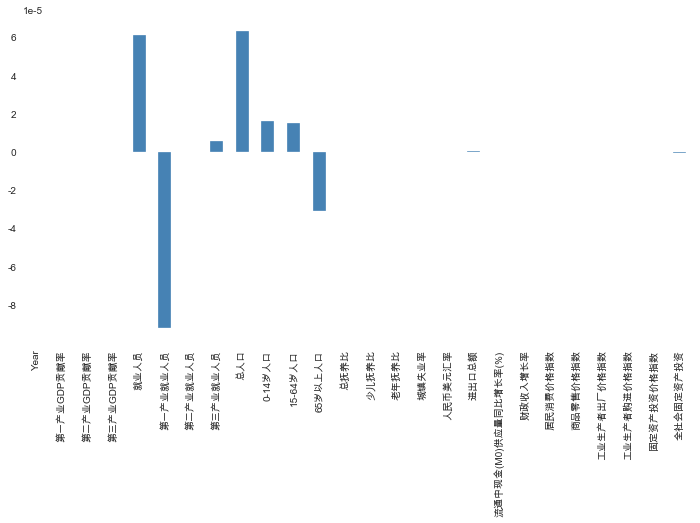

In [314]:
from sklearn.linear_model import Lasso
plt.rcParams["font.family"] = 'Arial Unicode MS'

model_lasso = Lasso()
model_lasso.fit(X, y)
pd.Series(model_lasso.coef_, index=X.columns).plot.bar(color='steelblue', figsize=(12, 6))

In [315]:
from sklearn.feature_selection import SelectFromModel
model_lasso = Lasso()
trans = SelectFromModel(model_lasso, threshold='median')
X_trans = trans.fit_transform(X_scaled, y_scaled)

print("We started with {0} features but retained only {1} of them!".format(X.shape[1], X_trans.shape[1]))

We started with 26 features but retained only 26 of them!


In [316]:
columns_retained_Select = X.columns[trans.get_support()].values
print('----------------------Retained Columns with SelectFromModel are:----------------------')
pd.DataFrame(X_trans, columns=columns_retained_Select).head()

----------------------Retained Columns with SelectFromModel are:----------------------


,Year,第一产业GDP贡献率,第二产业GDP贡献率,第三产业GDP贡献率,就业人员,第一产业就业人员,第二产业就业人员,第三产业就业人员,总人口,0-14岁人口,...,人民币美元汇率,进出口总额,流通中现金(M0)供应量同比增长率(%),财政收入增长率,居民消费价格指数,商品零售价格指数,工业生产者出厂价格指数,工业生产者购进价格指数,固定资产投资价格指数,全社会固定资产投资
0,0.000,0.000000,1.000000,0.000000,0.000000,0.533461,0.000000,0.000000,0.000000,0.851771,...,0.000000,0.000000,0.566524,0.140496,0.349020,0.364372,0.200680,0.555814,0.358621,0.000000
1,0.025,1.000000,0.000000,0.510158,0.040132,0.564093,0.019073,0.013642,0.032185,0.851771,...,0.029016,0.000515,0.248927,0.146006,0.152941,0.218623,0.190476,0.555814,0.358621,0.000078
2,0.050,0.958057,0.163476,0.302483,0.086325,0.614694,0.041175,0.018432,0.069432,1.000000,...,0.055349,0.000627,0.169528,0.192837,0.133333,0.198381,0.176871,0.555814,0.358621,0.000496
3,0.075,0.633554,0.379971,0.304740,0.119895,0.628350,0.062633,0.035476,0.101311,0.851771,...,0.067034,0.000904,0.381974,0.460055,0.133333,0.182186,0.180272,0.555814,0.358621,0.000805
4,0.100,0.671082,0.368189,0.282167,0.171708,0.615115,0.121335,0.072901,0.133073,0.851771,...,0.116372,0.001966,1.000000,0.663912,0.160784,0.234818,0.231293,0.555814,0.358621,0.001430


In [317]:
X_train=X_trans[:31]
X_test=X_trans[31:41]
y_train = np.array(gdp["GDP"][:31])
y_test = np.array(gdp["GDP"][31:41])

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)
"""
from sklearn.preprocessing import MinMaxScaler
#归一化 
scaler_SFDT=MinMaxScaler(feature_range=(0,1))

X_fit = scaler_SFDT.fit(X_train)
X_train = X_fit.transform(X_train)
X_test = X_fit.transform(X_test)

y_fit = scaler_SFDT.fit(y_train)
y_train = y_fit.transform(y_train).ravel()
y_test = y_fit.transform(y_test).ravel()"""

X_train:  (31, 26)
y_train:  (31,)
X_test:  (10, 26)
y_test (10,)


'\nfrom sklearn.preprocessing import MinMaxScaler\n#归一化 \nscaler_SFDT=MinMaxScaler(feature_range=(0,1))\n\nX_fit = scaler_SFDT.fit(X_train)\nX_train = X_fit.transform(X_train)\nX_test = X_fit.transform(X_test)\n\ny_fit = scaler_SFDT.fit(y_train)\ny_train = y_fit.transform(y_train).ravel()\ny_test = y_fit.transform(y_test).ravel()'

In [318]:
param_dict = dict(
kernel=['linear','poly', 'rbf'],
C = np.linspace(0.001, 1, 100),
degree = [2,3,4,5],
gamma=['scale', 'auto'],
)

 
forest_SFDT= SVR(kernel= 'poly', C= 1e2, gamma= 0.1)


randomSearch = RandomizedSearchCV(forest_SFDT, random_state = 42,param_distributions=param_dict, cv=10, scoring='neg_mean_squared_error',
                                  n_iter=23, refit=True, verbose=0, 
                                  n_jobs=1)

randomSearch.fit(X=X_train, y=y_train, groups=None)

svm_rbf_SFDT = randomSearch.best_estimator_
print("Best parameters related to this boost:  ", randomSearch.best_params_)
print("Best score related to this boost:  ", randomSearch.best_score_)
print(randomSearch)   

Best parameters related to this boost:   {'kernel': 'linear', 'gamma': 'auto', 'degree': 4, 'C': 1.0}
Best score related to this boost:   -0.04163748880654354
RandomizedSearchCV(cv=10, estimator=SVR(C=100.0, gamma=0.1, kernel='poly'),
                   n_iter=23, n_jobs=1,
                   param_distributions={'C': array([0.001     , 0.01109091, 0.02118182, 0.03127273, 0.04136364,
       0.05145455, 0.06154545, 0.07163636, 0.08172727, 0.09181818,
       0.10190909, 0.112     , 0.12209091, 0.13218182, 0.14227273,
       0.15236364, 0.16245455, 0.17254545, 0.18263636, 0.19272727,
       0.20281818, 0.2129...
       0.75781818, 0.76790909, 0.778     , 0.78809091, 0.79818182,
       0.80827273, 0.81836364, 0.82845455, 0.83854545, 0.84863636,
       0.85872727, 0.86881818, 0.87890909, 0.889     , 0.89909091,
       0.90918182, 0.91927273, 0.92936364, 0.93945455, 0.94954545,
       0.95963636, 0.96972727, 0.97981818, 0.98990909, 1.        ]),
                                        'degre

In [320]:
train_predict=svm_rbf_SFDT.predict(X_train)
test_predict=svm_rbf_SFDT.predict(X_test)

train_predict=np.reshape(train_predict, (len(train_predict), 1))
test_predict=np.reshape(test_predict, (len(test_predict), 1))
# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1, 1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1, 1))

from sklearn.metrics import explained_variance_score,r2_score
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))
print("-------------------------------------------------------------------")
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data R2 score: 0.9965841196438714
Test data R2 score: 0.8363740474518917
-------------------------------------------------------------------
Train data explained variance regression score: 0.9967880321489818
Test data explained variance regression score: 0.9057043989430159


#### DT

<AxesSubplot:>

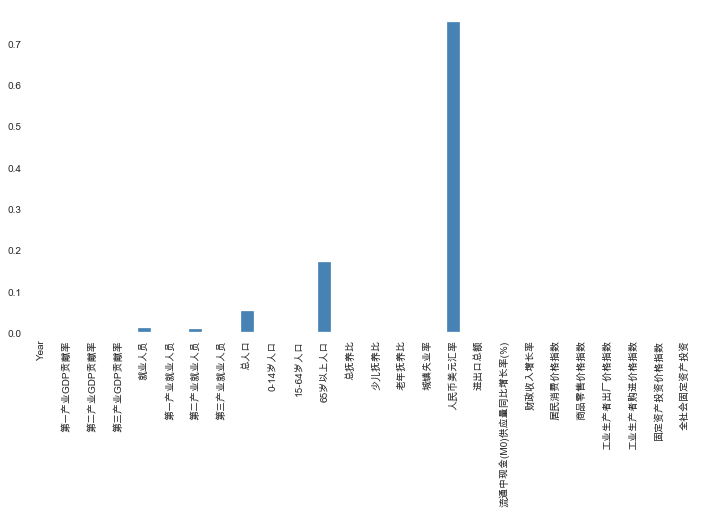

In [516]:
plt.rcParams["font.family"] = 'Arial Unicode MS'
DT = DecisionTreeRegressor()
DT.fit(X_scaled, y_scaled)
pd.Series(DT.feature_importances_, index=X.columns).plot.bar(color='steelblue', figsize=(12, 6))

In [517]:
from sklearn.feature_selection import SelectFromModel

DT= DecisionTreeRegressor()
trans = SelectFromModel(DT, threshold='median')
X_trans = trans.fit_transform(X_scaled, y_scaled)

print("We started with {0} features but retained only {1} of them!".format(X.shape[1], X_trans.shape[1]))

We started with 26 features but retained only 13 of them!


In [518]:
columns_retained_Select = X.columns[trans.get_support()].values
print('----------------------Retained Columns with SelectFromModel are:----------------------')
pd.DataFrame(X_trans, columns=columns_retained_Select).head()

----------------------Retained Columns with SelectFromModel are:----------------------


,Year,第一产业GDP贡献率,第一产业就业人员,第三产业就业人员,总人口,总抚养比,少儿抚养比,老年抚养比,人民币美元汇率,进出口总额,流通中现金(M0)供应量同比增长率(%),工业生产者出厂价格指数,工业生产者购进价格指数
0,0.000,0.000000,0.533461,0.000000,0.000000,0.721831,0.750769,0.017094,0.000000,0.000000,0.566524,0.200680,0.555814
1,0.025,1.000000,0.564093,0.013642,0.032185,0.721831,0.750769,0.017094,0.029016,0.000515,0.248927,0.190476,0.555814
2,0.050,0.958057,0.614694,0.018432,0.069432,1.000000,1.000000,0.000000,0.055349,0.000627,0.169528,0.176871,0.555814
3,0.075,0.633554,0.628350,0.035476,0.101311,0.721831,0.750769,0.017094,0.067034,0.000904,0.381974,0.180272,0.555814
4,0.100,0.671082,0.615115,0.072901,0.133073,0.721831,0.750769,0.017094,0.116372,0.001966,1.000000,0.231293,0.555814


In [519]:
X_train=X_trans[:31]
X_test=X_trans[31:41]
y_train = np.array(gdp["GDP"][:31])
y_test = np.array(gdp["GDP"][31:41])

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)
"""
from sklearn.preprocessing import MinMaxScaler
#归一化 
scaler_SFDT=MinMaxScaler(feature_range=(0,1))

X_fit = scaler_SFDT.fit(X_train)
X_train = X_fit.transform(X_train)
X_test = X_fit.transform(X_test)

y_fit = scaler_SFDT.fit(y_train)
y_train = y_fit.transform(y_train).ravel()
y_test = y_fit.transform(y_test).ravel()"""

X_train:  (31, 13)
y_train:  (31,)
X_test:  (10, 13)
y_test (10,)


'\nfrom sklearn.preprocessing import MinMaxScaler\n#归一化 \nscaler_SFDT=MinMaxScaler(feature_range=(0,1))\n\nX_fit = scaler_SFDT.fit(X_train)\nX_train = X_fit.transform(X_train)\nX_test = X_fit.transform(X_test)\n\ny_fit = scaler_SFDT.fit(y_train)\ny_train = y_fit.transform(y_train).ravel()\ny_test = y_fit.transform(y_test).ravel()'

In [520]:
param_dict = dict(
kernel=['linear','poly', 'rbf'],
C = np.linspace(0.001, 1, 100),
degree = [2,3,4,5],
gamma=['scale', 'auto'],
)

 
forest_SFDT= SVR(kernel= 'poly', C= 1e2, gamma= 0.1)



randomSearch = RandomizedSearchCV(forest_SFDT, random_state = 42,param_distributions=param_dict, cv=10, scoring='neg_mean_squared_error',
                                  n_iter=12, refit=True, verbose=0, 
                                  n_jobs=1)

randomSearch.fit(X=X_train, y=y_train, groups=None)

svm_rbf_SFDT = randomSearch.best_estimator_
print("Best parameters related to this boost:  ", randomSearch.best_params_)
print("Best score related to this boost:  ", randomSearch.best_score_)
print(randomSearch)   

Best parameters related to this boost:   {'kernel': 'linear', 'gamma': 'auto', 'degree': 3, 'C': 0.9091818181818182}
Best score related to this boost:   -0.026986932603810753
RandomizedSearchCV(cv=10, estimator=SVR(C=100.0, gamma=0.1, kernel='poly'),
                   n_iter=12, n_jobs=1,
                   param_distributions={'C': array([0.001     , 0.01109091, 0.02118182, 0.03127273, 0.04136364,
       0.05145455, 0.06154545, 0.07163636, 0.08172727, 0.09181818,
       0.10190909, 0.112     , 0.12209091, 0.13218182, 0.14227273,
       0.15236364, 0.16245455, 0.17254545, 0.18263636, 0.19272727,
       0.20281818, 0.2129...
       0.75781818, 0.76790909, 0.778     , 0.78809091, 0.79818182,
       0.80827273, 0.81836364, 0.82845455, 0.83854545, 0.84863636,
       0.85872727, 0.86881818, 0.87890909, 0.889     , 0.89909091,
       0.90918182, 0.91927273, 0.92936364, 0.93945455, 0.94954545,
       0.95963636, 0.96972727, 0.97981818, 0.98990909, 1.        ]),
                              

In [521]:
train_predict=svm_rbf_SFDT.predict(X_train)
test_predict=svm_rbf_SFDT.predict(X_test)

train_predict=np.reshape(train_predict, (len(train_predict), 1))
test_predict=np.reshape(test_predict, (len(test_predict), 1))
# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1, 1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1, 1))

from sklearn.metrics import explained_variance_score,r2_score
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))
print("-------------------------------------------------------------------")
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data R2 score: 0.9939649958283036
Test data R2 score: 0.969216829039976
-------------------------------------------------------------------
Train data explained variance regression score: 0.9939844184015467
Test data explained variance regression score: 0.9775435354291875


#### RF

<AxesSubplot:>

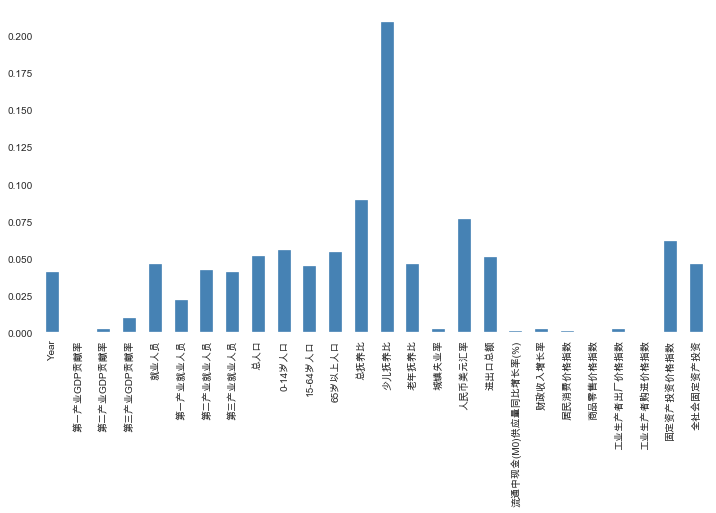

In [512]:
from sklearn.ensemble import RandomForestRegressor
plt.rcParams["font.family"] = 'Arial Unicode MS'
RF = RandomForestRegressor()
RF.fit(X_scaled, y_scaled.ravel())
pd.Series(RF.feature_importances_, index=X.columns).plot.bar(color='steelblue', figsize=(12, 6))

In [513]:
from sklearn.feature_selection import SelectFromModel

RF = RandomForestRegressor()
trans = SelectFromModel(RF, threshold='median')
X_trans = trans.fit_transform(X_scaled, y_scaled.ravel())

print("We started with {0} features but retained only {1} of them!".format(X.shape[1], X_trans.shape[1]))

columns_retained_Select = X.columns[trans.get_support()].values
print('----------------------Retained Columns with SelectFromModel are:----------------------')
pd.DataFrame(X_trans, columns=columns_retained_Select).head()

We started with 26 features but retained only 13 of them!
----------------------Retained Columns with SelectFromModel are:----------------------


,Year,第二产业就业人员,第三产业就业人员,总人口,0-14岁人口,15-64岁人口,65岁以上人口,总抚养比,少儿抚养比,老年抚养比,人民币美元汇率,进出口总额,全社会固定资产投资
0,0.000,0.000000,0.000000,0.000000,0.851771,0.201225,0.054217,0.721831,0.750769,0.017094,0.000000,0.000000,0.000000
1,0.025,0.019073,0.013642,0.032185,0.851771,0.201225,0.054217,0.721831,0.750769,0.017094,0.029016,0.000515,0.000078
2,0.050,0.041175,0.018432,0.069432,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.055349,0.000627,0.000496
3,0.075,0.062633,0.035476,0.101311,0.851771,0.201225,0.054217,0.721831,0.750769,0.017094,0.067034,0.000904,0.000805
4,0.100,0.121335,0.072901,0.133073,0.851771,0.201225,0.054217,0.721831,0.750769,0.017094,0.116372,0.001966,0.001430


In [514]:
X_train=X_trans[:31]
X_test=X_trans[31:41]
y_train = np.array(gdp["GDP"][:31])
y_test = np.array(gdp["GDP"][31:41])

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)
"""
from sklearn.preprocessing import MinMaxScaler
#归一化 
scaler_SFRF=MinMaxScaler(feature_range=(0,1))

X_fit = scaler_SFRF.fit(X_train)
X_train = X_fit.transform(X_train)
X_test = X_fit.transform(X_test)

y_fit = scaler_SFRF.fit(y_train)
y_train = y_fit.transform(y_train).ravel()
y_test = y_fit.transform(y_test).ravel()
"""
param_dict = dict(
kernel=['linear','poly', 'rbf'],
C = np.linspace(0.001, 1, 100),
degree = [2,3,4,5],
gamma=['scale', 'auto'],
)

 
forest_SFRF= SVR(kernel= 'poly', C= 1e2, gamma= 0.1)
all_num_iters = np.array([len(param_dict[i]) for i in param_dict.keys() if param_dict[i] is not None]).prod()
numIters = min(all_num_iters, 50)


randomSearch = RandomizedSearchCV(forest_SFRF, random_state = 42,param_distributions=param_dict, cv=10, scoring='neg_mean_squared_error',
                                  n_iter=12, refit=True, verbose=0, 
                                  n_jobs=1)

randomSearch.fit(X=X_train, y=y_train, groups=None)

svm_rbf_SFRF = randomSearch.best_estimator_
print("Best parameters related to this boost:  ", randomSearch.best_params_)
print("Best score related to this boost:  ", randomSearch.best_score_)
print(randomSearch)   

X_train:  (31, 13)
y_train:  (31,)
X_test:  (10, 13)
y_test (10,)
Best parameters related to this boost:   {'kernel': 'linear', 'gamma': 'auto', 'degree': 3, 'C': 0.9091818181818182}
Best score related to this boost:   -0.018103888210006133
RandomizedSearchCV(cv=10, estimator=SVR(C=100.0, gamma=0.1, kernel='poly'),
                   n_iter=12, n_jobs=1,
                   param_distributions={'C': array([0.001     , 0.01109091, 0.02118182, 0.03127273, 0.04136364,
       0.05145455, 0.06154545, 0.07163636, 0.08172727, 0.09181818,
       0.10190909, 0.112     , 0.12209091, 0.13218182, 0.14227273,
       0.15236364, 0.16245455, 0.17254545, 0.18263636, 0.19272727,
       0.20281818, 0.2129...
       0.75781818, 0.76790909, 0.778     , 0.78809091, 0.79818182,
       0.80827273, 0.81836364, 0.82845455, 0.83854545, 0.84863636,
       0.85872727, 0.86881818, 0.87890909, 0.889     , 0.89909091,
       0.90918182, 0.91927273, 0.92936364, 0.93945455, 0.94954545,
       0.95963636, 0.96972727, 0.

In [515]:
train_predict=svm_rbf_SFRF.predict(X_train)
test_predict=svm_rbf_SFRF.predict(X_test)

train_predict=np.reshape(train_predict, (len(train_predict), 1))
test_predict=np.reshape(test_predict, (len(test_predict), 1))
# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1, 1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1, 1))

from sklearn.metrics import explained_variance_score,r2_score
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))
print("-------------------------------------------------------------------")
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data R2 score: 0.9935103633853458
Test data R2 score: 0.9736581261729504
-------------------------------------------------------------------
Train data explained variance regression score: 0.9935125446739478
Test data explained variance regression score: 0.9885159432013985


#### GBDT

<AxesSubplot:>

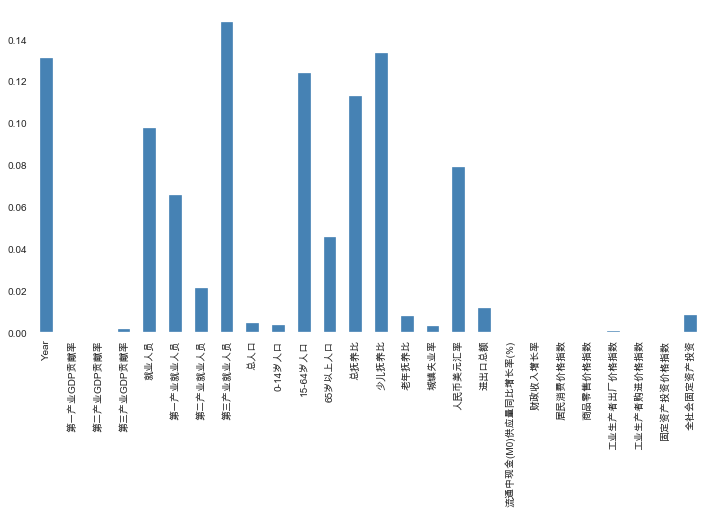

In [538]:
from sklearn.ensemble import GradientBoostingRegressor
plt.rcParams["font.family"] = 'Arial Unicode MS'

GBDT = GradientBoostingRegressor()
GBDT.fit(X_scaled, y_scaled.ravel())
pd.Series(GBDT.feature_importances_, index=X.columns).plot.bar(color='steelblue', figsize=(12, 6))

In [539]:
GBDT = GradientBoostingRegressor()
trans = SelectFromModel(GBDT, threshold='median')
X_trans = trans.fit_transform(X_scaled, y_scaled.ravel())

print("We started with {0} features but retained only {1} of them!".format(X.shape[1], X_trans.shape[1]))

columns_retained_Select = X.columns[trans.get_support()].values
print('----------------------Retained Columns with SelectFromModel are:----------------------')
pd.DataFrame(X_trans, columns=columns_retained_Select).head()

We started with 26 features but retained only 13 of them!
----------------------Retained Columns with SelectFromModel are:----------------------


,Year,第一产业就业人员,第二产业就业人员,第三产业就业人员,总人口,0-14岁人口,15-64岁人口,65岁以上人口,总抚养比,少儿抚养比,人民币美元汇率,进出口总额,全社会固定资产投资
0,0.000,0.533461,0.000000,0.000000,0.000000,0.851771,0.201225,0.054217,0.721831,0.750769,0.000000,0.000000,0.000000
1,0.025,0.564093,0.019073,0.013642,0.032185,0.851771,0.201225,0.054217,0.721831,0.750769,0.029016,0.000515,0.000078
2,0.050,0.614694,0.041175,0.018432,0.069432,1.000000,0.000000,0.000000,1.000000,1.000000,0.055349,0.000627,0.000496
3,0.075,0.628350,0.062633,0.035476,0.101311,0.851771,0.201225,0.054217,0.721831,0.750769,0.067034,0.000904,0.000805
4,0.100,0.615115,0.121335,0.072901,0.133073,0.851771,0.201225,0.054217,0.721831,0.750769,0.116372,0.001966,0.001430


In [540]:
X_train=X_trans[:31]
X_test=X_trans[31:41]
y_train = np.array(gdp["GDP"][:31])
y_test = np.array(gdp["GDP"][31:41])

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)
"""
from sklearn.preprocessing import MinMaxScaler
#归一化 
scaler_SFGD=MinMaxScaler(feature_range=(0,1))

X_fit = scaler_SFGD.fit(X_train)
X_train = X_fit.transform(X_train)
X_test = X_fit.transform(X_test)

y_fit = scaler_SFGD.fit(y_train)
y_train = y_fit.transform(y_train).ravel()
y_test = y_fit.transform(y_test).ravel()
"""
param_dict = dict(
kernel=['linear','poly', 'rbf'],
C = np.linspace(0.001, 1, 100),
degree = [2,3,4,5],
gamma=['scale', 'auto'],
)

 
forest_SFGD= SVR(kernel= 'poly', C= 1e2, gamma= 0.1)
all_num_iters = np.array([len(param_dict[i]) for i in param_dict.keys() if param_dict[i] is not None]).prod()
numIters = min(all_num_iters, 50)


randomSearch = RandomizedSearchCV(forest_SFGD, random_state = 42,param_distributions=param_dict, cv=10, scoring='neg_mean_squared_error',
                                  n_iter=15, refit=True, verbose=0, 
                                  n_jobs=1)

randomSearch.fit(X=X_train, y=y_train, groups=None)

svm_rbf_SFGD = randomSearch.best_estimator_
print("Best parameters related to this boost:  ", randomSearch.best_params_)
print("Best score related to this boost:  ", randomSearch.best_score_)
print(randomSearch)   

X_train:  (31, 13)
y_train:  (31,)
X_test:  (10, 13)
y_test (10,)
Best parameters related to this boost:   {'kernel': 'linear', 'gamma': 'auto', 'degree': 4, 'C': 1.0}
Best score related to this boost:   -0.021194002504395397
RandomizedSearchCV(cv=10, estimator=SVR(C=100.0, gamma=0.1, kernel='poly'),
                   n_iter=15, n_jobs=1,
                   param_distributions={'C': array([0.001     , 0.01109091, 0.02118182, 0.03127273, 0.04136364,
       0.05145455, 0.06154545, 0.07163636, 0.08172727, 0.09181818,
       0.10190909, 0.112     , 0.12209091, 0.13218182, 0.14227273,
       0.15236364, 0.16245455, 0.17254545, 0.18263636, 0.19272727,
       0.20281818, 0.2129...
       0.75781818, 0.76790909, 0.778     , 0.78809091, 0.79818182,
       0.80827273, 0.81836364, 0.82845455, 0.83854545, 0.84863636,
       0.85872727, 0.86881818, 0.87890909, 0.889     , 0.89909091,
       0.90918182, 0.91927273, 0.92936364, 0.93945455, 0.94954545,
       0.95963636, 0.96972727, 0.97981818, 0.989

In [541]:
train_predict=svm_rbf_SFGD.predict(X_train)
test_predict=svm_rbf_SFGD.predict(X_test)

train_predict=np.reshape(train_predict, (len(train_predict), 1))
test_predict=np.reshape(test_predict, (len(test_predict), 1))
# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1, 1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1, 1))

from sklearn.metrics import explained_variance_score,r2_score
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))
print("-------------------------------------------------------------------")
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data R2 score: 0.9944611712103423
Test data R2 score: 0.653664738634877
-------------------------------------------------------------------
Train data explained variance regression score: 0.9944639435350332
Test data explained variance regression score: 0.9780180085691519


#### AdaBoost

<AxesSubplot:>

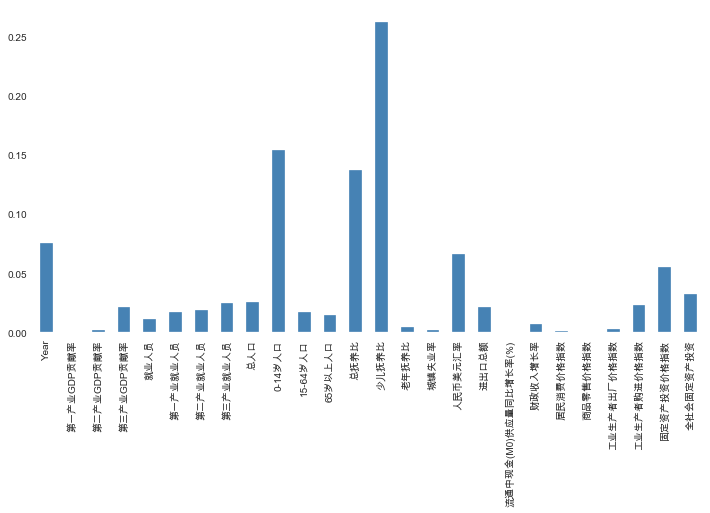

In [542]:
from sklearn.ensemble import AdaBoostRegressor
plt.rcParams["font.family"] = 'Arial Unicode MS'

Ada = AdaBoostRegressor()
Ada.fit(X_scaled, y_scaled.ravel())
pd.Series(Ada.feature_importances_, index=X.columns).plot.bar(color='steelblue', figsize=(12, 6))

In [543]:
Ada = AdaBoostRegressor()
trans = SelectFromModel(Ada, threshold='median')
X_trans = trans.fit_transform(X_scaled, y_scaled.ravel())

print("We started with {0} features but retained only {1} of them!".format(X.shape[1], X_trans.shape[1]))

columns_retained_Select = X.columns[trans.get_support()].values
print('----------------------Retained Columns with SelectFromModel are:----------------------')
pd.DataFrame(X_trans, columns=columns_retained_Select).head()

We started with 26 features but retained only 13 of them!
----------------------Retained Columns with SelectFromModel are:----------------------


,Year,第一产业就业人员,第二产业就业人员,第三产业就业人员,总人口,0-14岁人口,15-64岁人口,65岁以上人口,总抚养比,少儿抚养比,老年抚养比,进出口总额,固定资产投资价格指数
0,0.000,0.533461,0.000000,0.000000,0.000000,0.851771,0.201225,0.054217,0.721831,0.750769,0.017094,0.000000,0.358621
1,0.025,0.564093,0.019073,0.013642,0.032185,0.851771,0.201225,0.054217,0.721831,0.750769,0.017094,0.000515,0.358621
2,0.050,0.614694,0.041175,0.018432,0.069432,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000627,0.358621
3,0.075,0.628350,0.062633,0.035476,0.101311,0.851771,0.201225,0.054217,0.721831,0.750769,0.017094,0.000904,0.358621
4,0.100,0.615115,0.121335,0.072901,0.133073,0.851771,0.201225,0.054217,0.721831,0.750769,0.017094,0.001966,0.358621


In [544]:
X_train=X_trans[:31]
X_test=X_trans[31:41]
y_train = np.array(gdp["GDP"][:31])
y_test = np.array(gdp["GDP"][31:41])

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)
"""
from sklearn.preprocessing import MinMaxScaler
#归一化 
scaler_SFAda=MinMaxScaler(feature_range=(0,1))

X_fit = scaler_SFAda.fit(X_train)
X_train = X_fit.transform(X_train)
X_test = X_fit.transform(X_test)

y_fit = scaler_SFAda.fit(y_train)
y_train = y_fit.transform(y_train).ravel()
y_test = y_fit.transform(y_test).ravel()
"""
param_dict = dict(
kernel=['linear','poly', 'rbf'],
C = np.linspace(0.001, 1, 100),
degree = [2,3,4,5],
gamma=['scale', 'auto'],
)

 
forest_SFAda= SVR(kernel= 'poly', C= 1e2, gamma= 0.1)
all_num_iters = np.array([len(param_dict[i]) for i in param_dict.keys() if param_dict[i] is not None]).prod()
numIters = min(all_num_iters, 50)


randomSearch = RandomizedSearchCV(forest_SFAda, random_state = 42,param_distributions=param_dict, cv=10, scoring='neg_mean_squared_error',
                                  n_iter=12, refit=True, verbose=0, 
                                  n_jobs=1)

randomSearch.fit(X=X_train, y=y_train, groups=None)

svm_rbf_SFAda = randomSearch.best_estimator_
print("Best parameters related to this boost:  ", randomSearch.best_params_)
print("Best score related to this boost:  ", randomSearch.best_score_)
print(randomSearch)   

X_train:  (31, 13)
y_train:  (31,)
X_test:  (10, 13)
y_test (10,)
Best parameters related to this boost:   {'kernel': 'linear', 'gamma': 'auto', 'degree': 3, 'C': 0.9091818181818182}
Best score related to this boost:   -0.028827644214877157
RandomizedSearchCV(cv=10, estimator=SVR(C=100.0, gamma=0.1, kernel='poly'),
                   n_iter=12, n_jobs=1,
                   param_distributions={'C': array([0.001     , 0.01109091, 0.02118182, 0.03127273, 0.04136364,
       0.05145455, 0.06154545, 0.07163636, 0.08172727, 0.09181818,
       0.10190909, 0.112     , 0.12209091, 0.13218182, 0.14227273,
       0.15236364, 0.16245455, 0.17254545, 0.18263636, 0.19272727,
       0.20281818, 0.2129...
       0.75781818, 0.76790909, 0.778     , 0.78809091, 0.79818182,
       0.80827273, 0.81836364, 0.82845455, 0.83854545, 0.84863636,
       0.85872727, 0.86881818, 0.87890909, 0.889     , 0.89909091,
       0.90918182, 0.91927273, 0.92936364, 0.93945455, 0.94954545,
       0.95963636, 0.96972727, 0.

In [545]:
train_predict=svm_rbf_SFAda.predict(X_train)
test_predict=svm_rbf_SFAda.predict(X_test)

train_predict=np.reshape(train_predict, (len(train_predict), 1))
test_predict=np.reshape(test_predict, (len(test_predict), 1))
# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1, 1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1, 1))

from sklearn.metrics import explained_variance_score,r2_score
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))
print("-------------------------------------------------------------------")
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data R2 score: 0.9942517569975918
Test data R2 score: 0.8845016154333007
-------------------------------------------------------------------
Train data explained variance regression score: 0.9943297499148545
Test data explained variance regression score: 0.958172677167576
